<a href="https://colab.research.google.com/github/hyunjung930/Deep-learning_Studying/blob/hyunjung/d16_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [ ]:
%matplotlib inline

In [ ]:
model = keras.models.load_model(r'/content/drive/MyDrive/Colab Notebooks/딥러닝/best-cnn-model.h5')

In [ ]:
model.layers

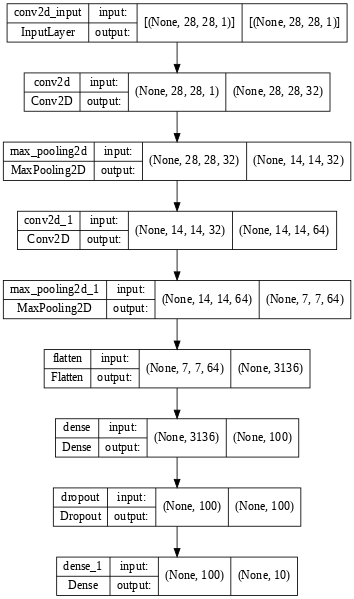

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=60)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conv = model.layers[0]

In [ ]:
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
?keras.layers.Layer.weights

In [ ]:
np.mean(conv.weights[0]), np.std(conv.weights[0])

(-0.019709427, 0.279377)

In [ ]:
np.min(conv.weights[0]), np.max(conv.weights[0])

(-2.088362, 0.44160715)

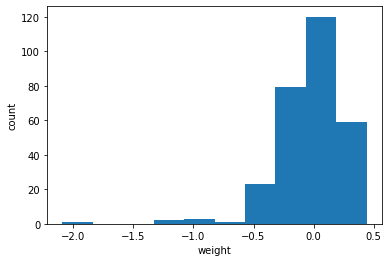

In [ ]:
plt.hist(conv.weights[0].numpy().reshape(-1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

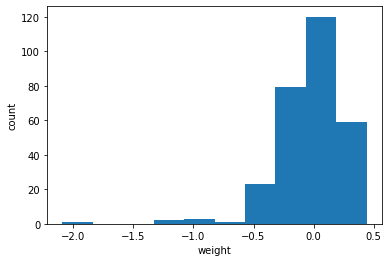

In [ ]:
plt.hist(conv.weights[0].numpy().ravel()) #flatten()
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
conv.weights[0].numpy()[:, :, 0, 0] # 첫 번째 필터의 커널 정보(=가중치) <= 학습된 결과 

array([[ 0.19719139,  0.20183541,  0.08392824],
       [ 0.1293684 , -0.18946645, -1.0391539 ],
       [ 0.2895595 , -0.7592089 , -2.088362  ]], dtype=float32)

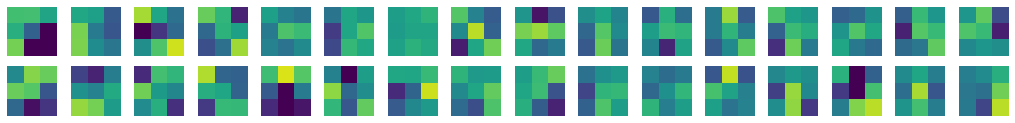

In [ ]:
fig, axes = plt.subplots(2, 16, figsize=(18, 2))
for i in range(2):
  for j in range(16):
    axes[i, j].imshow(conv.weights[0].numpy()[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axes[i, j].axis('off')
plt.show()

In [ ]:
no_training_model = keras.Sequential()

In [ ]:
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', \
                                          input_shape=(28, 28, 1), activation='relu'))

In [ ]:
no_training_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
no_training_model.layers

In [ ]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape, no_training_conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
np.mean(no_training_conv.weights[0]), np.std(no_training_conv.weights[0])

(-0.0057636453, 0.08189856)

In [ ]:
np.min(no_training_conv.weights[0]), np.max(no_training_conv.weights[0])

(-0.1416987, 0.14191575)

In [ ]:
from scipy.stats import uniform

rv = uniform.rvs(0, 1, (3, 3, 1, 32), random_state=42)
rv.shape

(3, 3, 1, 32)

In [ ]:
plt.hist(r.val())
plt.xlabel('rv')
plt.ylabel('count')
plt.show()

NameError: ignored

In [ ]:
plt.hist(no_training_conv.weights[0].numpy().reshape(-1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
no_training_conv.weights[0].numpy()[:, :, 0, 0]

In [ ]:
no_training_conv.weights[0].numpy().min(), no_training_conv.weights[0].numpy().max()

In [ ]:
fig, axes = plt.subplots(2, 16, figsize=(18, 2))
for i in range(2):
  for j in range(16):
    axes[i, j].imshow(no_training_conv.weights[0].numpy()[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axes[i, j].axis('off')
plt.show()

In [ ]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', name='dense1')
dense2 = keras.layers.Dense(10, activation = 'softmax', name='dense2')

In [ ]:
inputs = keras.input(shape=(784,), name = 'input')
inputs